In [36]:
import easyocr
from gtts import gTTS
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast
from IPython.display import Audio

In [37]:
reader = easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


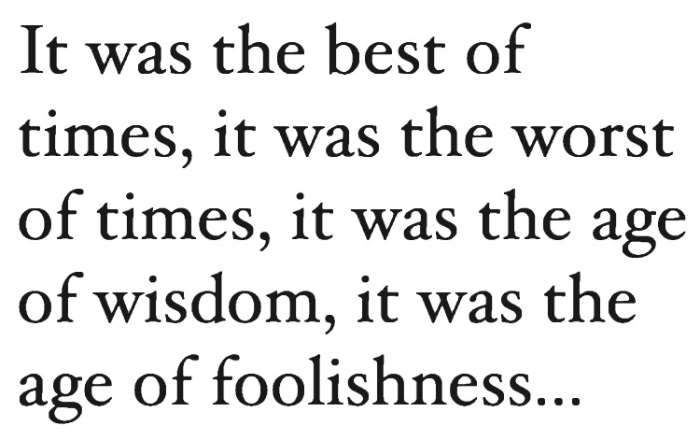

In [38]:
import PIL
from PIL import ImageDraw
im = PIL.Image.open("sentnce.png")
im

In [39]:
bounds = reader.readtext('sentnce.png', add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-')
bounds

[([[0, 0], [564, 0], [564, 108], [0, 108]],
  'It was the best of',
  0.8850644259494923),
 ([[0, 73], [700, 73], [700, 199], [0, 199]],
  'times, it was the worst',
  0.9564698536142395),
 ([[0, 149], [700, 149], [700, 299], [0, 299]],
  'oftimes, it was the age',
  0.5868258785037612),
 ([[0, 232], [678, 232], [678, 370], [0, 370]],
  'ofwisdom; it was the',
  0.6022632962609651),
 ([[0, 309], [585, 309], [585, 440], [0, 440]],
  'age of foolishness_',
  0.5697653409071133)]

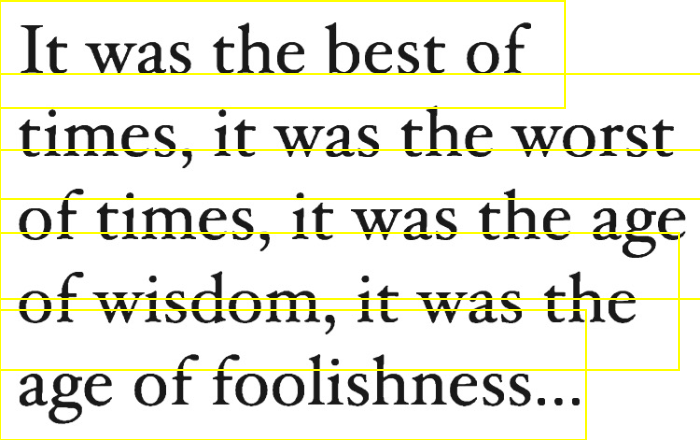

In [40]:
def draw_boxes(image, bounds, color='yellow', width=2):
    draw = ImageDraw.Draw(image)
    for bound in bounds:
        p0, p1, p2, p3 = bound[0]
        draw.line([*p0, *p1, *p2, *p3, *p0], fill=color, width=width)
    return image

draw_boxes(im, bounds)

In [41]:
text_list = reader.readtext('sentnce.png', add_margin=0.55, width_ths=0.7, link_threshold=0.8, decoder='beamsearch',blocklist='=-', detail=0)
text_list

['It was the best of',
 'times, it was the worst',
 'oftimes, it was the age',
 'ofwisdom; it was the',
 'age of foolishness_']

In [42]:
text_comb=' '.join(text_list)
text_comb

'It was the best of times, it was the worst oftimes, it was the age ofwisdom; it was the age of foolishness_'

In [43]:
model = MBartForConditionalGeneration.from_pretrained("facebook/mbart-large-50-one-to-many-mmt")


In [44]:
tokenizer = MBart50TokenizerFast.from_pretrained("facebook/mbart-large-50-one-to-many-mmt", src_lang="en_XX")


In [45]:
article_en = text_comb

In [46]:
model_inputs = tokenizer(article_en, return_tensors="pt")


In [47]:
# translate from English to Hindi
generated_tokens = model.generate(
    **model_inputs,
    forced_bos_token_id=tokenizer.lang_code_to_id["hi_IN"]
)


c:\Users\sragh\anaconda3\lib\site-packages\transformers\generation\utils.py:1313: UserWarning: Using `max_length`'s default (200) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


In [48]:
translation = tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)


In [64]:
translation


['यह सबसे अच्छा समय था, यह सबसे बुरा समय था, यह ज्ञान का युग था, यह मूर्खता का युग था।']

In [69]:
mystr=" ".join(map(str,translation))
print(mystr)

यह सबसे अच्छा समय था, यह सबसे बुरा समय था, यह ज्ञान का युग था, यह मूर्खता का युग था।


In [57]:
import pyttsx3

In [58]:
text_speech=pyttsx3.init()

In [65]:
text_speech.say(translation)
text_speech.save_to_file(translation, 'answerrree1.mp3')
text_speech.runAndWait()

In [70]:
text1=gTTS(mystr)
text1.save("new.mp3")